# Avalanche

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import mibian as mb
import scipy.stats as si

In [2]:
ava = yf.download('AVAX-USD', start='2021-03-01', end='2022-03-01') #to download data for Avalanche from yahoo finance

[*********************100%***********************]  1 of 1 completed


In [3]:
ava.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,23.877151,27.769768,23.697975,27.403772,27.403772,248201636
2021-03-02,27.420732,31.742144,26.015213,27.135157,27.135157,563934379
2021-03-03,27.148203,29.230932,26.619446,27.272078,27.272078,305240058
2021-03-04,27.266541,28.733620,24.280476,25.805176,25.805176,290696777
2021-03-05,25.781891,25.781891,23.620703,24.378054,24.378054,192065807


In [4]:
ava.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-25,76.537056,81.859871,72.947037,80.832619,80.832619,1884195969
2022-02-26,80.847862,84.872398,78.503708,81.879707,81.879707,1419135253
2022-02-27,81.793427,82.264816,73.751022,74.991188,74.991188,1577126485
2022-02-28,74.977539,85.394432,72.127090,84.339233,84.339233,1906636314
2022-03-01,84.347267,90.677765,83.969139,86.735931,86.735931,2279596412


In [5]:
ava['%-chg'] = ava['Adj Close'].pct_change () #to get the percentage change in price between two periods

In [6]:
ava.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg
Date,,,,,,,
2021-03-01,23.877151,27.769768,23.697975,27.403772,27.403772,248201636,NaN
2021-03-02,27.420732,31.742144,26.015213,27.135157,27.135157,563934379,-0.009802
2021-03-03,27.148203,29.230932,26.619446,27.272078,27.272078,305240058,0.005046
2021-03-04,27.266541,28.733620,24.280476,25.805176,25.805176,290696777,-0.053788
2021-03-05,25.781891,25.781891,23.620703,24.378054,24.378054,192065807,-0.055304


In [7]:
ava.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg
Date,,,,,,,
2022-02-25,76.537056,81.859871,72.947037,80.832619,80.832619,1884195969,0.056305
2022-02-26,80.847862,84.872398,78.503708,81.879707,81.879707,1419135253,0.012954
2022-02-27,81.793427,82.264816,73.751022,74.991188,74.991188,1577126485,-0.084130
2022-02-28,74.977539,85.394432,72.127090,84.339233,84.339233,1906636314,0.124655
2022-03-01,84.347267,90.677765,83.969139,86.735931,86.735931,2279596412,0.028417


array([<AxesSubplot:xlabel='Date'>], dtype=object)

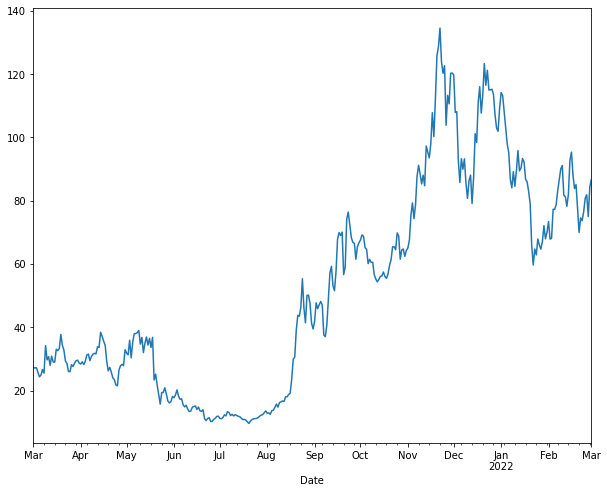

In [8]:
ava['Adj Close'].plot(figsize=(10, 8), subplots=True) #to show the price movement for the previous year

In [9]:
#the figure above shows that the price of Avalanche went high in the last 5 months

## Calculation of Volatility

In [10]:
ava ['log returns'] = np.log ((ava['Adj Close']/ava['Adj Close'].shift(1))) #to get the log returns

In [11]:
ava.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,log returns
Date,,,,,,,,
2021-03-01,23.877151,27.769768,23.697975,27.403772,27.403772,248201636,NaN,NaN
2021-03-02,27.420732,31.742144,26.015213,27.135157,27.135157,563934379,-0.009802,-0.009851
2021-03-03,27.148203,29.230932,26.619446,27.272078,27.272078,305240058,0.005046,0.005033
2021-03-04,27.266541,28.733620,24.280476,25.805176,25.805176,290696777,-0.053788,-0.055288
2021-03-05,25.781891,25.781891,23.620703,24.378054,24.378054,192065807,-0.055304,-0.056892


In [12]:
ava.tail()

,Open,High,Low,Close,Adj Close,Volume,%-chg,log returns
Date,,,,,,,,
2022-02-25,76.537056,81.859871,72.947037,80.832619,80.832619,1884195969,0.056305,0.054777
2022-02-26,80.847862,84.872398,78.503708,81.879707,81.879707,1419135253,0.012954,0.012871
2022-02-27,81.793427,82.264816,73.751022,74.991188,74.991188,1577126485,-0.084130,-0.087881
2022-02-28,74.977539,85.394432,72.127090,84.339233,84.339233,1906636314,0.124655,0.117477
2022-03-01,84.347267,90.677765,83.969139,86.735931,86.735931,2279596412,0.028417,0.028021


array([<AxesSubplot:xlabel='Date'>], dtype=object)

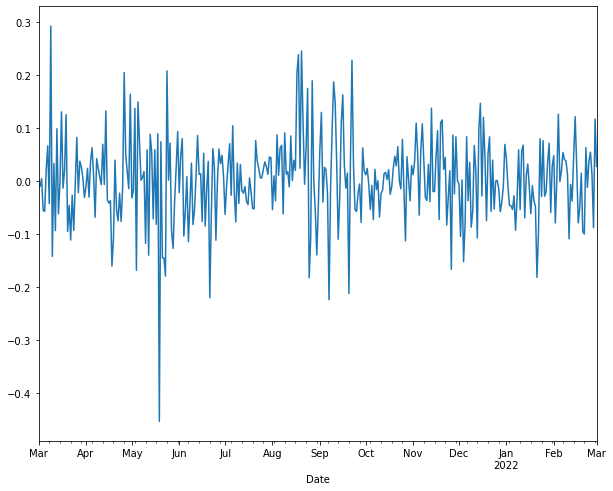

In [13]:
ava['log returns'].plot(figsize=(10, 8), subplots=True) #to show the  movement of the log returns 

In [14]:
ava ['log returns'].std() #to calculate the daily standard

0.0808653310775778

In [15]:
vol = np.sqrt(365) * ava ['log returns'].std()

In [16]:
A_vol = ('The annualised volatility is', round(vol,4)) 

In [17]:
print(A_vol)

('The annualised volatility is', 1.5449)


Text(0.5, 1.0, 'Avalanche volatility:1.544929980987646')

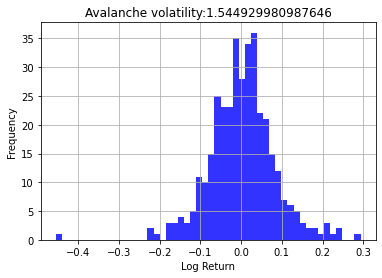

In [18]:
fig, ax = plt.subplots()
ava ['log returns'].hist(ax=ax, bins=50, alpha=0.8, color='b') 
ax.set_xlabel ('Log Return')
ax.set_ylabel ('Frequency')
ax.set_title ('Avalanche volatility:' + str(vol) )

In [19]:
#the figure above shows the volatility of Avalanche
#this is high in the last 4 months because the cryptocurrency market is very volatile

## European Put Option

In [20]:
S0 = 98.40              # spot price of Avalanche as at 14:40 31/03/2022
K = 110                 # strike price of Avalanche was reasonably set at a 10.5% margin
T = 1/52                # time to maturity of one week to provide for volatility of Avalanche
r = 0.0168              # risk free rate as gotten from bloomberg
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff

### Binomial Tree Model

In [21]:
dT = float(T) / N                             # Delta t
u = np.exp(vol * np.sqrt(dT))                 # up factor
d = 1.0 / u 

In [22]:
u

1.1316688399941754

In [23]:
d

0.8836507330228752

In [24]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [25]:
S

array([[ 98.4       , 111.35621386, 126.01835736, 142.61104829],
       [  0.        ,  86.95123213,  98.4       , 111.35621386],
       [  0.        ,   0.        ,  76.83452001,  86.95123213],
       [  0.        ,   0.        ,   0.        ,  67.89487993]])

In [26]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4695502538341595

#### To calculate the option value at the each final node

In [27]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 23.04876787],
       [ 0.        ,  0.        ,  0.        , 42.10512007]])

#### To calculate the option value at earlier nodes

In [28]:
 # for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[15.41512616,  6.48399491,  0.        ,  0.        ],
       [ 0.        , 23.32402828, 12.22489647,  0.        ],
       [ 0.        ,  0.        , 33.15363448, 23.04876787],
       [ 0.        ,  0.        ,  0.        , 42.10512007]])

In [29]:
print('The European '  + payoff +   ' value is', str( V[0,0]))

The European put value is 15.415126157715115


### Monte Carlo Simulation

In [30]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - vol ** 2 / 2) * dt + vol * np.sqrt(dt) * rn[t]) 
    return S

In [31]:
S = mcs_simulation_np(1000)

In [32]:
S = np.transpose(S)
S

array([[ 98.4       ,  99.1176979 ,  98.82983633, ...,  92.12665648,
         92.92725716,  94.00430501],
       [ 98.4       ,  98.01189686,  97.77297051, ...,  65.72211519,
         65.54631025,  65.75100848],
       [ 98.4       ,  98.81901978,  99.17545111, ...,  93.23240607,
         92.76428937,  93.25383101],
       ...,
       [ 98.4       ,  98.58738641,  98.8677822 , ...,  89.86765324,
         90.31006295,  90.92457293],
       [ 98.4       ,  97.00147379,  97.57722163, ..., 100.07100388,
        100.25684253, 100.87442655],
       [ 98.4       ,  98.8566152 ,  97.65608096, ...,  78.82599537,
         79.47235902,  79.82934659]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

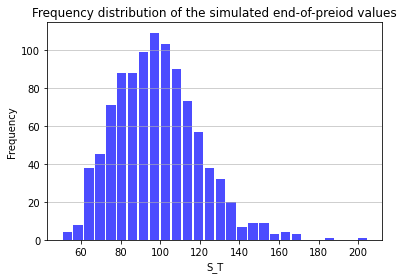

In [33]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='b',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [44]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('The European ' + payoff   +  ' value is', str(p))

The European put value is 15.533560716772747


### Black Scholes Model

In [34]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S0: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of Avalanche
    #payoff: put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    payoff == "put"
    option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [35]:
euro_option_bs(98.4, 110, 1/52, 0.0168, 1.54, payoff)

15.808408210282465

In [36]:
S = np.linspace(50,200,11)
pp = np.zeros((len(S),1))
for i in range(len(S)):
    pp[i] = euro_option_bs(S[i], 110, 1/52, 0.0168, 1.54, payoff)

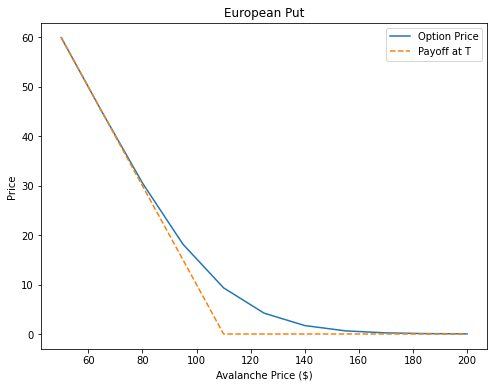

In [37]:
fig = plt.figure(figsize=(8,6))
plt.plot(S, pp, '-')
plt.plot(S, np.maximum(110-S,0), '--')
plt.xlabel('Avalanche Price ($)')
plt.ylabel('Price')
plt.title('European Put')
plt.legend(['Option Price','Payoff at T'])

## Calculation of Greeks

### Delta

In [38]:
def delta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

q = 0              #q= dividend. There is no dividend for cryptocurrencies therefore q is 0

In [39]:
delta(98.4, 110, 1/52, 0.0168, 1.54, payoff)

-0.6603897070999005

In [40]:
S = np.linspace(50,200,11)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 110, 1/52, 0.0168, 1.54, payoff)

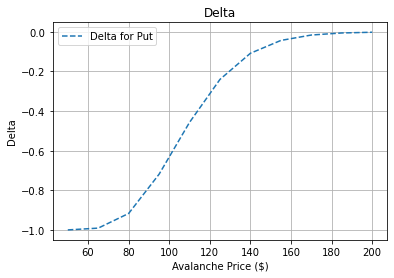

In [41]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Avalanche Price ($)')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

#### Surface of Delta

In [42]:
S = np.linspace(50, 200, 11)
T = np.linspace(0.00274, 0.01919, 11)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 110, T[i], 0.0168, 1.54, payoff)

/var/folders/sq/tmb0fzk55vsckvtmjzv8g8z00000gn/T/ipykernel_7850/2021797818.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


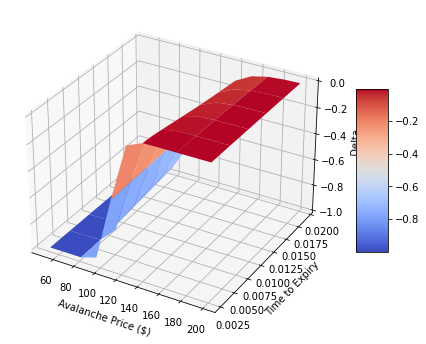

In [43]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Avalanche Price ($)')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [44]:
#If the Avalanche price increases/decreases by 1 dollar, then the value of the option will decrease/increase by $0.6604

### Gamma

In [45]:
def gamma(S, K, T, r, vol):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma =  si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [46]:
gamma(98.4, 110, 1/52, 0.0168, 1.54)

0.017428610157718547

In [47]:
S = np.linspace(50,200,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 110, 1/52, 0.0168, 1.54)

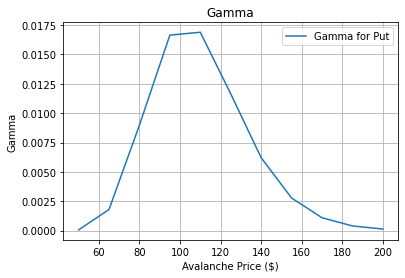

In [48]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Avalanche Price ($)')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

#### Surface of Gamma

In [49]:
S = np.linspace(50, 200, 11)
T = np.linspace(0.00274, 0.01919, 11)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 110, T[i], 0.0168, 1.54)

/var/folders/sq/tmb0fzk55vsckvtmjzv8g8z00000gn/T/ipykernel_7850/2296718592.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


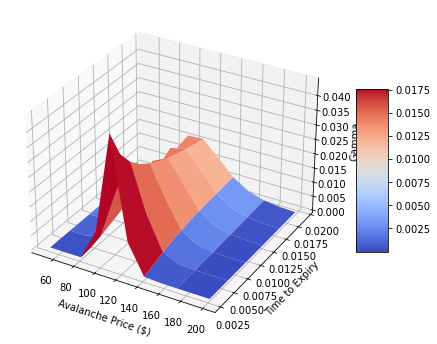

In [50]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Avalanche Price ($)')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [51]:
#for every $1 increase(decrease) in the price of the Avalanche, the price of the Delta will theoretically increase(decrease) by 0.0174 

### Speed

In [52]:
def speed(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [53]:
speed(98.4, 110, 1/52, 0.0168, 1.54, payoff)

2.299884720878136e-05

In [54]:
S = np.linspace(50,200,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 110, 1/52, 0.0168, 1.54, payoff)

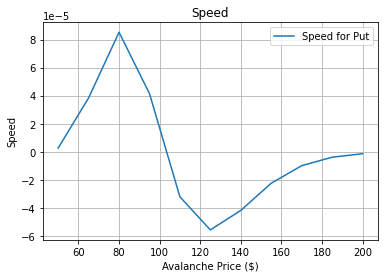

In [55]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Avalanche Price ($)')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

#### Surface of Speed

In [56]:
S = np.linspace(50, 200, 11)
T = np.linspace(0.00274, 0.01919, 11)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 110, T[i], 0.0168, 1.54, payoff)

/var/folders/sq/tmb0fzk55vsckvtmjzv8g8z00000gn/T/ipykernel_7850/1624940398.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


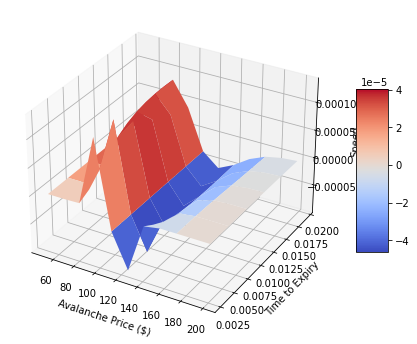

In [57]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Avalanche Price ($)')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [58]:
#for every $1 increase(decrease) in the price of the Avalanche, the price of the Gamma will theoretically increase(decrease) by 2.2999

### Theta

In [59]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta
q = 0              #q= dividend. There is no dividend for cryptocurrencies therefore q is 0

In [60]:
theta(98.4, 110, 1/52, 0.0168, 0, 1.54, payoff)

201.4652603703211

In [61]:
T = np.linspace(0.00274, 0.01919,12)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(98.4, 110, T[i], 0.0168, 0, 1.54, payoff)

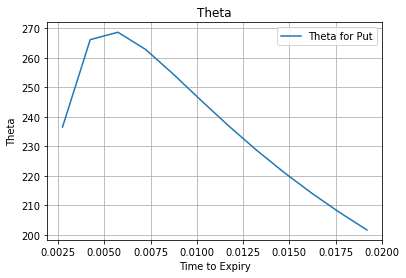

In [62]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

#### Surface of Theta

In [63]:
S = np.linspace(50, 200, 11)
T = np.linspace(0.00274, 0.01919, 11)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 110, T[i], 0.0168, 0, 1.54, payoff)

/var/folders/sq/tmb0fzk55vsckvtmjzv8g8z00000gn/T/ipykernel_7850/3042324791.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


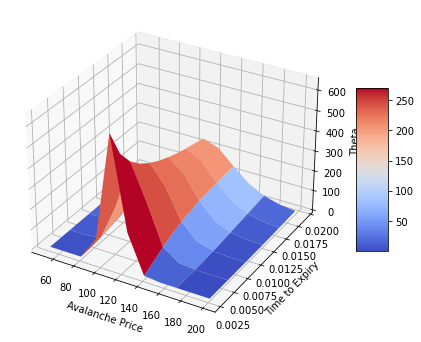

In [64]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Avalanche Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [65]:
#that as the time to expiry gets closer by 1 day (i.e., 1/365 = 0.0027), the option price will decrease by $0.5520 (i.e., 201.4653/365).

### Rho

In [66]:
def rho(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [67]:
rho(98.4, 110, 1/52, 0.0168, 1.54, payoff)

-1.5536683728637057

In [68]:
r = np.linspace(0.01,0.02,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(98.4, 110, 1/52, r[i], 1.54, payoff)

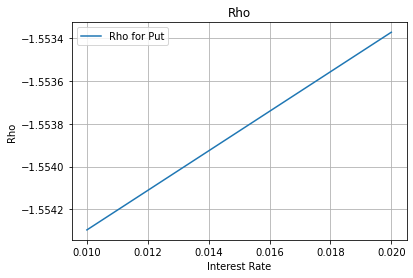

In [69]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend([ 'Rho for Put'])

#### Surface of Rho

In [70]:
S = np.linspace(0.01, 0.02, 11)
T = np.linspace(0.00274, 0.01919, 11)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 110, T[i], 0.0168, 1.54, payoff)

/var/folders/sq/tmb0fzk55vsckvtmjzv8g8z00000gn/T/ipykernel_7850/3779932964.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


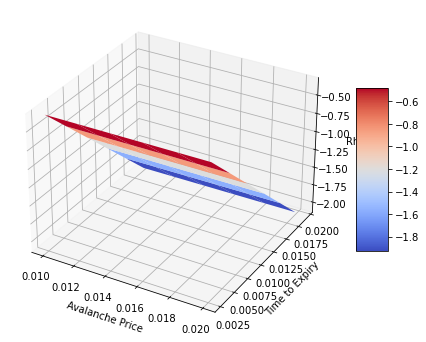

In [71]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Avalanche Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [72]:
#for every 0.1% increase in the interest rate, the option value will decrease by $0.0016 (i.e., 0.1% x 1.5537) 

### Vega

In [73]:
def vega(S, K, T, r, vol):
    
    d1 = (np.log(S / K) + (r  + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [74]:
vega(98.4, 110, 1/52, 0.168, 1.54)

5.025453895848808

In [75]:
vol = np.linspace(0.1,3.0,11)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(98.4, 110, 1/52, 0.0168, vol[i])

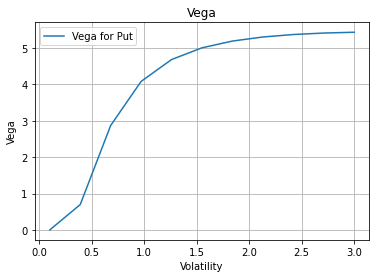

In [76]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

#### Surface of Vega

In [77]:
S = np.linspace(50, 200, 11)
T = np.linspace(0.1, 3.0, 11)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 110, T[i], 0.0168, 1.54)

/var/folders/sq/tmb0fzk55vsckvtmjzv8g8z00000gn/T/ipykernel_7850/3141613151.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


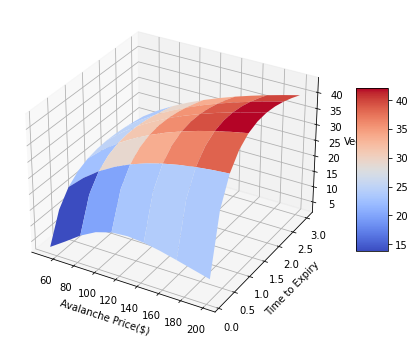

In [78]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Avalanche Price($)')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [79]:
#for every 1% increase(decrease) in the volatility, the option value will increase by $0.0503 (i.e., 1% x 5.0255). 